<h1><center>Análisis de Sistemas de Infraestructura <br>
    Tarea: Redes - Parte 2 Jupyter</center></h1>

In [1]:
# Primero importemos las librerías que usaremos en esta tarea. Recuerde que en caso de no tener instalada previamente alguna libreria necesitará instalarla con !pip install NombreDeLaLibreria

import networkx as nx  # Importar networkx
import matplotlib.pyplot as plt # importar librería de matplotlib
import matplotlib.colors as colors
from itertools import count
import geopy.distance 
import pandas as pd #Libreria para manejo de datos y estadistica
import numpy as np
from networkx.algorithms.connectivity import minimum_st_edge_cut
import math
import random
from sklearn.decomposition import PCA
import import_ipynb
import Parte1Redes #Libreria de nuestro archivo primera parte del taller, para poder importarla de esta forma ambos archivos tienen que estar en una misma ruta (misma carpeta) 
from Parte1Redes import nodos
%matplotlib inline

G=nx.DiGraph()

from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print('... clean')

... clean


<h2> 3. La hoja Data SubRed, dentro del archivo de excel, contiene una base de datos con información detallada sobre una sub-red de la red vial Nacional. La Tabla contiene las siguientes
columnas: link, TPD/año, Accidentes/año, Muertes/año, No. Interrupciones/año, Tiempo nooperación/año, inversiones/año, Volumen carga/año <\h2>

<h3> Revise y modifique la base de datos si es necesario <\h3>

In [2]:
Gr=nx.Graph() #Creo un grafico tipo graph (no direccionado)

nombre_list=['Aguachica','Barrancabermeja','Bosconia','Bucaramanga','Cúcuta','Barranquilla','Cartagena','Ciénaga','Duitama']

#anadir nodos
i = 0
while i < 50:
    n=nodos['Ciudad'].loc[i]
    if n in nombre_list:
        Gr.add_node(nodos['Ciudad'].loc[i], pos=(nodos['Longitud'].loc[i], nodos['Latitud'].loc[i]))
    i+=1
print('Number of nodes', len(Gr.nodes))
print('Number of edges', len(Gr.edges))
Gr.nodes

Number of nodes 9
Number of edges 0


NodeView(('Aguachica', 'Barrancabermeja', 'Barranquilla', 'Bosconia', 'Bucaramanga', 'Cartagena', 'Ciénaga', 'Cúcuta', 'Duitama'))

In [3]:
#cargar SubRed y añadir los links

sub_red= pd.read_excel(r'Red_Vial(50 Nodos).xlsx',sheet_name = "Data SubRed") #Cargar SubRed

i = 0

while i < 12:
    
    Gr.add_edge(sub_red['Origen'].loc[i], sub_red['Destino'].loc[i], km= sub_red['Km'].loc[i], TPD= sub_red['TPD'].loc[i], 
               Accidentes= sub_red['Accidentes'].loc[i], Muertes=sub_red['Muertes'].loc[i], Interrupciones=sub_red['Interrupciones'].loc[i],
               Tiempo_no_operación= sub_red['Tiempo no operacion (Días)'].loc[i])
    i+=1

print('Number of nodes', len(Gr.nodes))
print('Number of edges', len(Gr.edges))

Number of nodes 9
Number of edges 12


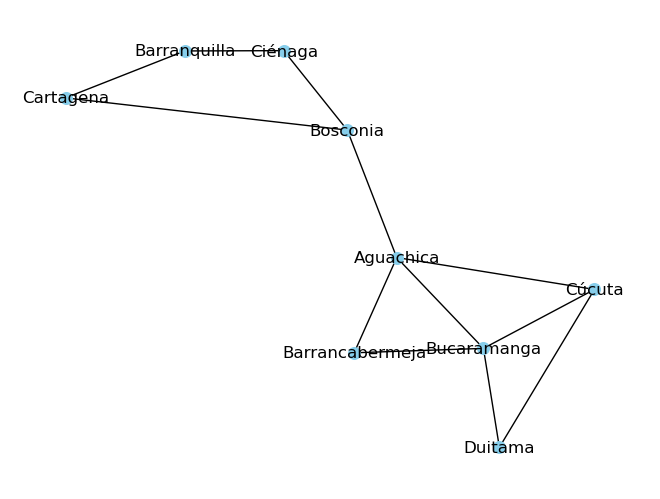

In [4]:
nx.draw(Gr, nx.get_node_attributes(Gr, 'pos'), with_labels=True, node_color='skyblue', node_size=70)

In [5]:
#km
km=nx.get_edge_attributes(Gr, 'km')
km=pd.DataFrame.from_dict(km, orient='index')
km.columns = ['km']

#TPD
TPD=nx.get_edge_attributes(Gr, 'TPD')
TPD=pd.DataFrame.from_dict(TPD, orient='index')
TPD.columns = ['TPD']

#Accidentes
Accidentes=nx.get_edge_attributes(Gr, 'Accidentes')
Accidentes=pd.DataFrame.from_dict(Accidentes, orient='index')
Accidentes.columns = ['Accidentes']

#Muertes 
Muertes=nx.get_edge_attributes(Gr, 'Muertes')
Muertes=pd.DataFrame.from_dict(Muertes, orient='index')
Muertes.columns = ['Muertes']

#Interrupciones
Interrupciones=nx.get_edge_attributes(Gr, 'Interrupciones')
Interrupciones=pd.DataFrame.from_dict(Interrupciones, orient='index')
Interrupciones.columns = ['Interrupciones']

#Tiempo no operación
Tiempo_no_operación=nx.get_edge_attributes(Gr, 'Tiempo_no_operación')
Tiempo_no_operación=pd.DataFrame.from_dict(Tiempo_no_operación, orient='index')
Tiempo_no_operación.columns = ['t no operación']

#Concatenar
df_SubRed = pd.concat([Accidentes, Muertes,TPD, Interrupciones, km, Tiempo_no_operación], axis=1)

columnas = df_SubRed.columns

<h3> Construya un diagrama de Box-Plot para las diferentes variables y concluya respecto a
la dispersión de los datos <\h3>

,Accidentes,Muertes,TPD,Interrupciones,km,t no operación
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,877.083333,17.833333,6916.666667,70.587964,136.220333,14.213223
std,466.643812,10.794218,1164.500153,45.616704,48.342914,12.833058
min,204.000000,4.000000,5000.000000,5.815269,60.833000,1.000000
25%,485.250000,8.250000,6000.000000,46.739140,107.379750,3.591500
50%,883.000000,17.000000,7000.000000,71.345115,135.854000,12.761118
75%,1117.250000,27.000000,8000.000000,82.961213,152.861250,22.260691
max,1635.000000,34.000000,9000.000000,172.510731,236.514000,44.872578


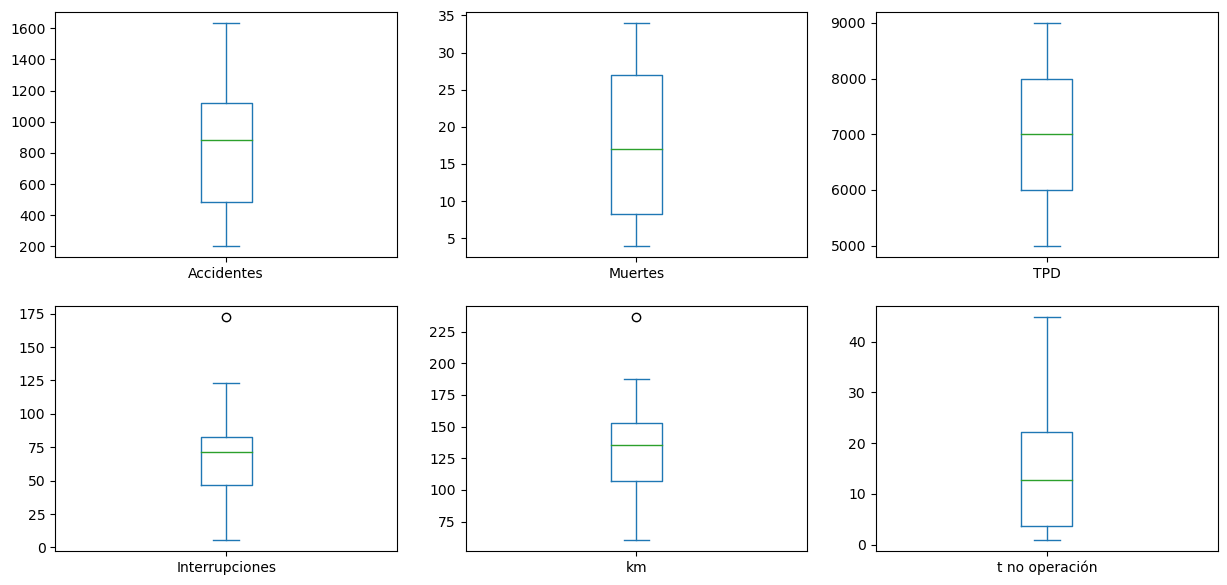

In [6]:
plt.figure(figsize=(15,7))

for i in range(6):
    
    plt.subplot(2,3,i+1)
    df_SubRed[columnas[i]].plot(kind='box') #dibujar Box-Plot

plt.savefig('boxplots.PNG')
df_SubRed.describe()

,Accidentes,Muertes,TPD,Interrupciones,km,t no operación
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.612658,2.664380,8.828568,3.952967,4.853673,2.181255
std,0.645484,0.737235,0.169854,0.980651,0.372433,1.128196
min,5.318120,1.386294,8.517193,1.760487,4.108132,0.000000
25%,6.176589,2.095858,8.699515,3.843004,4.675580,1.278423
50%,6.782583,2.826245,8.853665,4.266808,4.910950,2.543293
75%,7.018314,3.293872,8.987197,4.418346,5.024690,3.102619
max,7.399398,3.526361,9.104980,5.150459,5.466007,3.803827


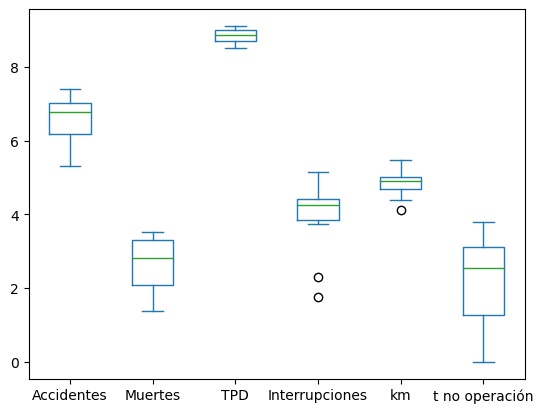

In [7]:
np.log(df_SubRed).plot(kind='box') #dibujar Box-Plot
np.log(df_SubRed).describe()

<h3> Construya la matriz de Covarianza. ¿Qué puede concluir a partir de esta? <\h3>

In [8]:
df_SubRed_estandarizado=(df_SubRed-np.mean(df_SubRed,axis=0))/np.sqrt(np.var(df_SubRed,axis=0)) #Estandarización
n=len(df_SubRed)
Ciudades=df_SubRed.index #Las ciudades como índices 

df_SubRed_array_est= df_SubRed_estandarizado.values 

cov=np.matmul(df_SubRed_array_est.T,df_SubRed_array_est)/n                             #Cov Matrix
print(cov)

df_SubRed_estandarizado.corr()

[[ 1.          0.88677654  0.2266983   0.91148347 -0.36829526  0.47172831]
 [ 0.88677654  1.          0.01325922  0.71906655 -0.40487466  0.44744827]
 [ 0.2266983   0.01325922  1.          0.29500874  0.11439401  0.16839007]
 [ 0.91148347  0.71906655  0.29500874  1.         -0.20401195  0.65530484]
 [-0.36829526 -0.40487466  0.11439401 -0.20401195  1.          0.13759772]
 [ 0.47172831  0.44744827  0.16839007  0.65530484  0.13759772  1.        ]]


,Accidentes,Muertes,TPD,Interrupciones,km,t no operación
Accidentes,1.000000,0.886777,0.226698,0.911483,-0.368295,0.471728
Muertes,0.886777,1.000000,0.013259,0.719067,-0.404875,0.447448
TPD,0.226698,0.013259,1.000000,0.295009,0.114394,0.168390
Interrupciones,0.911483,0.719067,0.295009,1.000000,-0.204012,0.655305
km,-0.368295,-0.404875,0.114394,-0.204012,1.000000,0.137598
t no operación,0.471728,0.447448,0.168390,0.655305,0.137598,1.000000


<h3> Genere un indicador de la importancia (Prioridad) de cada link dentro de la sub-red. Analice y concluya. <\h3>

In [9]:
print('Porcentaje de varianza explicada:')
ev=list(PCA(n_components=6).fit(df_SubRed_estandarizado).explained_variance_ratio_)
print(ev)

Porcentaje de varianza explicada:
[0.5374932245885412, 0.21837758492177825, 0.14442003678248422, 0.06357169194024109, 0.03301865348790173, 0.003118808279053478]


Tomamos los primeros 3 componentes y creamos el indicador

Porcentaje de la informacion retenida 0.9


Text(0, 0.5, '% de varianza explicada acumulada')

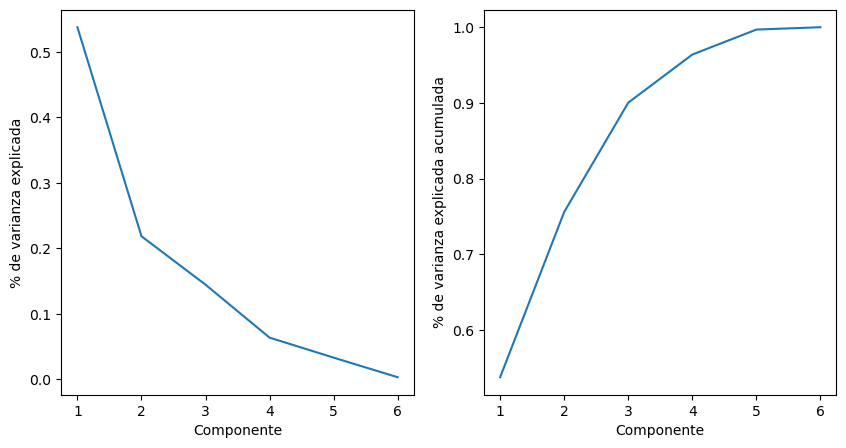

In [10]:
rev=ev[0]+ev[1]+ev[2]
print('Porcentaje de la informacion retenida', round(rev,3))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([1,2,3,4,5,6],ev)
plt.xlabel('Componente')
plt.ylabel('% de varianza explicada')

plt.subplot(1,2,2)

ev_acum=[]
a = 0
for i in range(len(ev)):
    
    a+=ev[i]
    ev_acum.append(a)

plt.plot([1,2,3,4,5,6],ev_acum)
plt.xlabel('Componente')
plt.ylabel('% de varianza explicada acumulada')

<h3> $ I_{l}=\sum_{j=1}^{m} w_j \, c_{lj} $ <\h3>

In [11]:
principalComponents = PCA(n_components=3).fit_transform(df_SubRed_estandarizado)
c=principalComponents.copy()
principalComponents

array([[ 9.68379170e-01, -4.49833536e-01,  1.08588252e+00],
       [ 5.21714900e-01,  3.47591750e-02,  2.23691108e+00],
       [-6.98446066e-02,  6.14323049e-01,  2.55744356e-01],
       [-2.22649627e+00, -7.68852798e-01,  1.76821099e-01],
       [ 4.23782892e-01, -4.81912580e-01, -1.15052107e+00],
       [ 2.31948192e+00, -6.90755164e-01, -1.35605137e+00],
       [-5.49301967e-02, -1.92622614e+00, -3.21246764e-01],
       [-1.40324136e+00,  8.99394732e-01,  1.24447734e-01],
       [-2.69753843e+00, -8.49185437e-01, -3.00094656e-03],
       [ 3.86573478e+00,  1.03191079e+00,  1.83511316e-01],
       [ 1.87130332e-02, -1.54538347e-01, -4.67608556e-01],
       [-1.66575584e+00,  2.74091626e+00, -7.64889402e-01]])

In [12]:
w=[]
w.append(ev[0]/rev)
w.append(ev[1]/rev)
w.append(ev[2]/rev)
print(w)


I={}
for l in range(0, len(list(Ciudades))):
    suma2=0
    for j in range(0,3):
        suma2=suma2+w[j]*c[l][j]
    I[list(Ciudades)[l]]=suma2


Indicador_n = pd.DataFrame(list(I.items()), columns = ['Link','Indicador de importancia'])
Indicador_n.set_index('Link',inplace=True)
Indicador_n.sort_values(by='Indicador de importancia', ascending=False)

[0.5970217589147087, 0.2425633736264323, 0.16041486745885913]


,Indicador de importancia
Link,
"(Bucaramanga, Cúcuta)",2.587669
"(Barranquilla, Cartagena)",0.999698
"(Aguachica, Bosconia)",0.678740
"(Aguachica, Barrancabermeja)",0.643222
"(Aguachica, Bucaramanga)",0.148339
"(Barrancabermeja, Bucaramanga)",-0.048447
"(Bucaramanga, Duitama)",-0.101325
"(Cúcuta, Duitama)",-0.452346
"(Barranquilla, Ciénaga)",-0.551559
